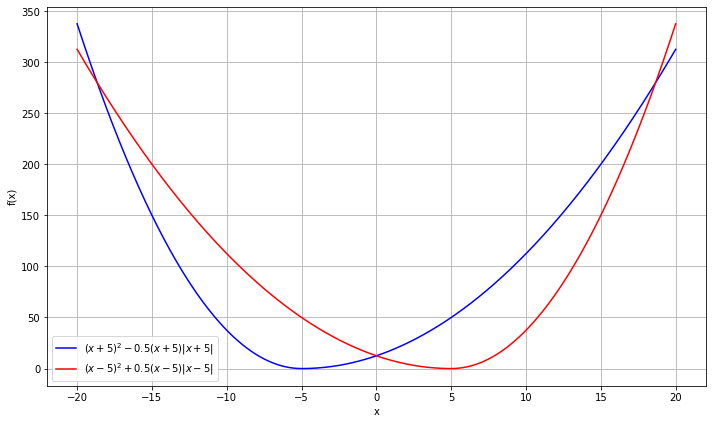

In [1]:
import numpy as np
import matplotlib.pyplot as plt


s = 5 #(shift)
alpha = 0.5          


x_vals = np.linspace(-20, 20, 1000)


# 2. Asymmetric power: x^2 + alpha x|x|
f_power1 = (x_vals+s)**2 - alpha * (x_vals+s) * np.abs(x_vals+s) 
f_power2 = (x_vals-s)**2 + alpha * (x_vals-s) * np.abs(x_vals-s)


# Plotting
plt.figure(figsize=(10, 6))

plt.plot(x_vals, f_power1, label=fr'$(x+{s})^2 - {alpha}(x+{s})|x+{s}|$', linestyle='-', color='blue')
plt.plot(x_vals, f_power2, label=fr'$(x-{s})^2 + {alpha}(x-{s})|x-{s}|$', linestyle='-', color='red')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Distance between eigenvalues at x = 0: 12.0


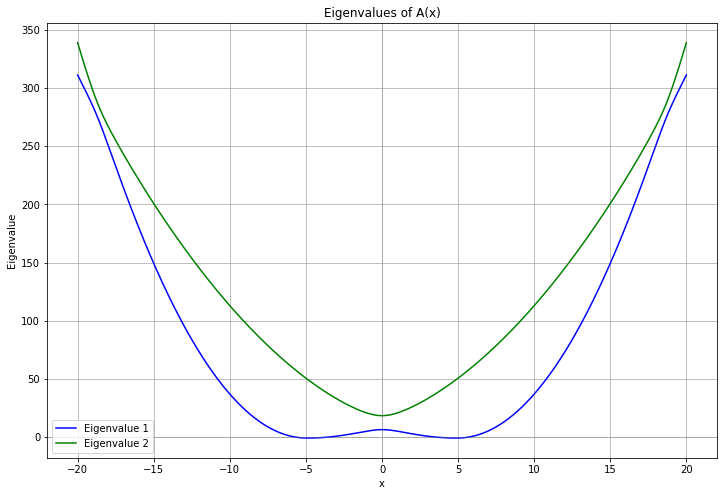

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

#parameters
delta = 6 #(1/2 the spacing between the two curves)
alpha = 0.5 #(how lop sided)
s = 5

x = sp.symbols('x')


f1_sym = sp.Function('f1')(x)
f2_sym = sp.Function('f2')(x)

A = sp.Matrix([[f1_sym, delta],
               [delta, f2_sym]])

eigenvals = list(A.eigenvals().keys())


f1_actual = (x - s)**2 + alpha * (x - s) * sp.Abs(x - s)
f2_actual = (x + s)**2 - alpha * (x + s) * sp.Abs(x + s)

eigenval_substituted = [ev.subs({f1_sym: f1_actual, f2_sym: f2_actual}) for ev in eigenvals]
eigenval_funcs = [sp.lambdify(x, ev, 'numpy') for ev in eigenval_substituted]

eigvals_at_0 = [f(0) for f in eigenval_funcs]
distance_at_0 = abs(eigvals_at_0[0] - eigvals_at_0[1])
print("Distance between eigenvalues at x = 0:", distance_at_0)

x_vals = np.linspace(-20, 20, 1000)
y_vals = [f(x_vals) for f in eigenval_funcs]

plt.figure(figsize=(12, 8))
plt.plot(x_vals, y_vals[0], label='Eigenvalue 1', color='blue')
plt.plot(x_vals, y_vals[1], label='Eigenvalue 2', color='green')
plt.title("Eigenvalues of A(x)")
plt.xlabel("x")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.legend()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()
